## Test du submodule expbuilder d'arcgis.apps (API Python)


Le sous-module expbuilder est disponible depuis la **version 2.2.0 de l'API Python d'ArcGIS**. Ce Notebook teste les différentes capacités disponibles avec ce sous-module.  

**+ d'infos :** 🔧  
[API Reference](https://developers.arcgis.com/python/api-reference/arcgis.apps.expbuilder.html)  
[Guide](https://developers.arcgis.com/python/guide/experience-builder-workflows/)

#### Connexion au GIS

In [1]:
from arcgis.gis import GIS
gis = GIS("home")

/opt/conda/lib/python3.9/site-packages/arcgis/gis/__init__.py:703: UserWarning: You are logged on as plouis_esrifrance with an administrator role, proceed with caution.
  warnings.warn(


In [22]:
#vérifiez que votre version de l'API est au minimum en 2.2.0
import arcgis
arcgis.__version__

'2.2.0.1'

#### dir(expbuilder)

In [2]:
from arcgis.apps import expbuilder
print(dir(expbuilder))

['Templates', 'WebExperience', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_ref', 'expbuilder']


### Classe Templates (pour examiner les modèles d'expériences)

Attention, tous les modèles ne sont pas encore accessibles via l'API.  
Permet de prévisualiser les modèles d'expériences avant d'en créer une.

In [3]:
from arcgis.apps.expbuilder import Templates

#### Modèles disponibles

In [4]:
print(dir(Templates))

['BILLBOARD', 'BLANKFULLSCREEN', 'BLANKSCROLLING', 'DART', 'DASH', 'EPIC', 'EXHIBITION', 'FOLDABLE', 'GALLERY', 'GENERAL', 'INDICATOR', 'INTRODUCTION', 'JEWELERYBOX', 'JOURNEY', 'LAUNCHPAD', 'MONITOR', 'PARALLAX', 'POCKET', 'QUICKNAVIGATION', 'REVEAL', 'RIBBON', 'SCENIC', 'SNAPSHOT', 'SUMMARY', 'TIMELINE', '__class__', '__doc__', '__members__', '__module__']


**Modèles disponibles en 2.2.0 :** 
+ 'BILLBOARD' 
+ 'BLANKFULLSCREEN' 
+ 'BLANKSCROLLING' 
+ 'DART'
+ 'DASH'
+ 'EPIC', 
+ 'EXHIBITION'
+ 'FOLDABLE'
+ 'GALLERY'
+ 'GENERAL' 
+ 'INDICATOR'
+ 'INTRODUCTION'
+ 'JEWELERYBOX'
+ 'JOURNEY'
+ 'LAUNCHPAD'
+ 'MONITOR'
+ 'PARALLAX'
+ 'POCKET'
+ 'QUICKNAVIGATION'
+ 'REVEAL"
+ 'RIBBON'
+ 'SCENIC'
+ 'SNAPSHOT'
+ 'SUMMARY'
+ 'TIMELINE'

#### Prévisualisation des modèles

In [5]:
parallax = Templates.PARALLAX
parallax.preview(width=1200, height=600) #default : width=800, height=500

In [6]:
foldable = Templates.FOLDABLE
foldable.preview()

In [7]:
launchpad = Templates.LAUNCHPAD
launchpad.preview()

### Classe WebExperience

In [8]:
from arcgis.apps.expbuilder import WebExperience

In [9]:
print(dir(WebExperience))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_add_resource', '_create_new_experience', '_draft', '_duplicate', '_expdict', '_gis', '_item', '_itemid', '_local', '_properties', '_resources', 'clone', 'datasources', 'delete', 'item', 'itemid', 'preview', 'reload', 'save', 'upload', 'view']


#### créer une nouvelle expérience

In [10]:
new_exp = WebExperience(template = "epic", name = "Experience - API Python")
new_exp.item

<Item title:"Experience - API Python" type:Web Experience owner:plouis_esrifrance>

In [11]:
new_exp.preview()

#### récupérer l'identifiant d'une experience

In [12]:
new_exp.itemid

'2fb435367f614e51a277f8d5c3caf43a'

#### publier une experience

In [13]:
new_exp.save(publish=True)

True

#### supprimer une expérience

In [14]:
new_exp.delete()

True

#### rechercher une expérience existante

In [15]:
search_exp = gis.content.search(query="owner:" + gis.users.me.username, 
                                item_type="Web Experience", 
                                max_items=30)
random_exp = WebExperience("{0}".format(search_exp[2].itemid), gis = gis)#changer l'indice de la liste si nécessaire
random_exp.preview(width=1200, height=800)

#### vérifier les sources de données

In [16]:
random_exp.datasources

{'dataSource_1': {'id': 'dataSource_1',
  'type': 'WEB_MAP',
  'sourceLabel': "Carte des activités de Paris pour l'année 2024",
  'itemId': '9664dd589dbd4590a578de7e22374e40',
  'portalUrl': 'https://esrifrance.maps.arcgis.com',
  'childDataSourceJsons': {'6cf2892384d746ed91f4291290e280e3': {'id': 'dataSource_1-6cf2892384d746ed91f4291290e280e3',
    'sourceLabel': 'Activités dans Paris',
    'type': 'FEATURE_LAYER',
    'url': 'https://services.arcgis.com/d3voDfTFbHOCRwVR/arcgis/rest/services/Carte_des_activités_de_Paris_pour_l_année_2024_WFL1/FeatureServer/0',
    'portalUrl': 'https://www.arcgis.com',
    'itemId': 'a79f50a87c8e439ea24ba42ca5df4dd9',
    'geometryType': 'esriGeometryPoint',
    'dataViews': {'dataView_1': {'id': 'dataView_1',
      'label': 'Tri par date',
      'orderBy': [{'jimuFieldName': 'Date_de_début', 'order': 'ASC'}]}}},
   '4e98f9014a234077ad6cff3b4442ab31': {'id': 'dataSource_1-4e98f9014a234077ad6cff3b4442ab31',
    'sourceLabel': 'activites_Paris',
    'ty

#### cloner une expérience

In [19]:
toclone_exp = WebExperience("{0}".format(search_exp[20].itemid), gis = gis)#changer l'indice de la liste si nécessaire

<Item title:"Ressources Experience Builder" type:Web Experience owner:cloneto_esrifrance>
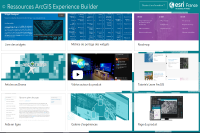

In [20]:
target = GIS(username="target_user",password="target_user_password")#infos d'authentification à modifier
cloned_exp = toclone_exp.clone(
    target = target, 
    owner = "target_user",
    search_existing_items = False,
)
cloned_exp

In [21]:
WebExperience(cloned_exp).view(width=1200, height=800)